In [74]:
import pathlib
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

## Importación de archivos

In [2]:
url = '/content/rawDataset/'

data_dir = pathlib.Path(url)

class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

[]


In [4]:
energyco2 = pd.read_csv(os.path.join(url, 'energyco2.csv'))
owidco2 = pd.read_csv(os.path.join(url, 'owid-co2-data.csv'))
countr = pd.read_csv(os.path.join(url, 'country.csv'))

In [4]:
country = countr.country.to_list()

## Atributos a usar

### energyco2

In [5]:
energyco2.drop('Unnamed: 0', axis = 1, inplace = True)
energyco2['Energy_consumption'] = energyco2['Energy_consumption'] * 293.07
energyco2['Energy_production'] = energyco2['Energy_production'] * 293.07
energyco2 = energyco2.round(3)
energyco2 = energyco2.replace('Cabo Verde','Cape Verde')
energyco2 = energyco2.replace('U.S. Virgin Islands','United States Virgin Islands')
energyco2 = energyco2.replace('Côte d’Ivoire',"Cote d'Ivoire")
energyco2 = energyco2.replace('Guinea-Bissau','Guinea Bissau')
energyco2 = energyco2.replace('Czech Republic','Czechia')
energyco2 = energyco2.replace('The Bahamas','Bahamas')
energyco2 = energyco2.replace('Burma','Myanmar')
energyco2 = energyco2.replace('Macau','Macao')
energyco2 = energyco2.replace('Gambia, The','Gambia')
energyco2 = energyco2[energyco2.Country.isin(country + ['World'])]
energyco2 = energyco2[energyco2['Year'] >= 1980][energyco2['Energy_type'] == 'all_energy_types']
energyco2 = energyco2[['Country', 'Year', 'Energy_consumption',
       'Energy_production']]
energyco2.columns = ['country', 'year', 'energyConsumption',
       'energyProduction']

In [6]:
energyco2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8640 entries, 0 to 55434
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            8640 non-null   object 
 1   year               8640 non-null   int64  
 2   energyConsumption  8210 non-null   float64
 3   energyProduction   8210 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 337.5+ KB


In [7]:
energyco2

,country,year,energyConsumption,energyProduction
0,World,1980,85840.141,86847.551
6,Afghanistan,1980,7.791,21.265
12,Albania,1980,47.765,45.590
18,Algeria,1980,228.798,821.480
24,American Samoa,1980,1.727,0.000
...,...,...,...,...
55404,Vietnam,2019,1028.408,749.196
55416,Western Sahara,2019,1.088,0.000
55422,Yemen,2019,46.604,39.058
55428,Zambia,2019,60.694,43.375


### owidco2

In [8]:
owidco2 = owidco2[['country', 'co2','year', 'co2_per_capita', 'gdp', 'population']]
owidco2 = owidco2[owidco2['year'] >= 1980]
owidco2 = owidco2.replace('Micronesia (country)','Micronesia')
owidco2 = owidco2.replace('Timor','Timor-Leste')
owidco2 = owidco2.replace('Guinea-Bissau','Guinea Bissau')
owidco2 = owidco2[owidco2['country'].isin(country + ['World'])]
owidco2.columns = ['country', 'co2emissions','year', 'co2PerCapita', 'gdp', 'population']

In [ ]:
owidco2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8586 entries, 31 to 25988
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       8586 non-null   object 
 1   co2emissions  8502 non-null   float64
 2   year          8586 non-null   int64  
 3   co2PerCapita  8468 non-null   float64
 4   gdp           6395 non-null   float64
 5   population    8539 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 469.5+ KB


In [9]:
owidco2.tail()

,country,co2emissions,year,co2PerCapita,gdp,population
25984,Zimbabwe,10.738,2016,0.765,2.096179e+10,14030338.0
25985,Zimbabwe,9.582,2017,0.673,2.194784e+10,14236599.0
25986,Zimbabwe,11.854,2018,0.821,2.271535e+10,14438812.0
25987,Zimbabwe,10.949,2019,0.748,NaN,14645473.0
25988,Zimbabwe,10.531,2020,0.709,NaN,14862927.0


### Merge de tablas

In [10]:
merge = owidco2.merge(energyco2, how="left", on = ["country", "year"])

***Eliminando países con mayor cantidad de valores faltantes y de menos relevancia de emisión CO2***

In [11]:
datos = merge[~merge.country.isin(['Antarctica', 'Eritrea', 'Micronesia', 'Namibia', 'Puerto Rico',
       'Saint Helena', 'Timor-Leste', 'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Belize', 'Bermuda',
       'Bhutan', 'British Virgin Islands', 'Brunei', 'Cook Islands',
       'Faeroe Islands', 'Fiji', 'French Guiana', 'French Polynesia',
       'Greenland', 'Grenada', 'Guadeloupe', 'Guyana', 'Kiribati',
       'Kosovo', 'Macao', 'Maldives', 'Martinique', 'Montserrat', 'Nauru',
       'New Caledonia', 'Niue', 'Papua New Guinea',
       'Reunion', 'Saint Kitts and Nevis', 'Saint Pierre and Miquelon',
       'Saint Vincent and the Grenadines', 'Samoa', 'Slovakia',
       'Solomon Islands', 'Somalia', 'South Sudan', 'Sudan', 'Suriname',
       'Tonga', 'Turks and Caicos Islands', 'Tuvalu'
       ,'Vanuatu', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina',
       'Congo','Democratic Republic of Congo',
       'Estonia', 'Georgia', 'Guinea Bissau', 'Kazakhstan',
       'Kyrgyzstan', 'Latvia', 'Lithuania', 'Moldova', 'Montenegro',
       'North Macedonia', 'Palestine', 'Slovenia',
       'Tajikistan', 'Turkmenistan', 'Uzbekistan', 'Central African Republic', 'Equatorial Guinea', 'Mauritania', 'Lesotho'])]

In [12]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5658 entries, 0 to 8585
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            5658 non-null   object 
 1   co2emissions       5658 non-null   float64
 2   year               5658 non-null   int64  
 3   co2PerCapita       5658 non-null   float64
 4   gdp                5338 non-null   float64
 5   population         5658 non-null   float64
 6   energyConsumption  5434 non-null   float64
 7   energyProduction   5434 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 397.8+ KB


***Poniendo en la misma unidad co2emissions con co2PerCapita (Toneladas)***

In [13]:
datos['co2emissions'] = datos['co2emissions']*(10**6)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [14]:
datos_country = datos[datos['country'] != 'World'].reset_index(drop=True)
datos_country

,country,co2emissions,year,co2PerCapita,gdp,population,energyConsumption,energyProduction
0,Afghanistan,1756000.0,1980,0.132,1.532984e+10,13356500.0,7.791,21.265
1,Afghanistan,1978000.0,1981,0.150,1.564534e+10,13171679.0,8.777,27.175
2,Afghanistan,2095000.0,1982,0.163,1.598041e+10,12882518.0,9.348,27.862
3,Afghanistan,2520000.0,1983,0.201,1.675533e+10,12537732.0,11.436,29.223
4,Afghanistan,2822000.0,1984,0.231,1.707215e+10,12204306.0,11.489,29.256
...,...,...,...,...,...,...,...,...
5612,Zimbabwe,10738000.0,2016,0.765,2.096179e+10,14030338.0,46.666,35.024
5613,Zimbabwe,9582000.0,2017,0.673,2.194784e+10,14236599.0,45.936,32.542
5614,Zimbabwe,11854000.0,2018,0.821,2.271535e+10,14438812.0,47.502,38.408
5615,Zimbabwe,10949000.0,2019,0.748,NaN,14645473.0,49.426,42.044


In [15]:
datos_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617 entries, 0 to 5616
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            5617 non-null   object 
 1   co2emissions       5617 non-null   float64
 2   year               5617 non-null   int64  
 3   co2PerCapita       5617 non-null   float64
 4   gdp                5331 non-null   float64
 5   population         5617 non-null   float64
 6   energyConsumption  5394 non-null   float64
 7   energyProduction   5394 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 351.2+ KB


### Imputación IterativeNumber, usando un estimador como el DecissionTreeRegressor

In [6]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor
imp = IterativeImputer(estimator = DecisionTreeRegressor(max_features = 'sqrt', random_state = 42))

In [17]:
col_impute = ['co2emissions', 'co2PerCapita', 'gdp','energyConsumption', 'energyProduction']
datos_country[col_impute] = imp.fit_transform(datos_country[col_impute])
datos_country['year'] = datos_country['year'].astype(int)

/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:701: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  ConvergenceWarning,


In [18]:
datos_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617 entries, 0 to 5616
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            5617 non-null   object 
 1   co2emissions       5617 non-null   float64
 2   year               5617 non-null   int64  
 3   co2PerCapita       5617 non-null   float64
 4   gdp                5617 non-null   float64
 5   population         5617 non-null   float64
 6   energyConsumption  5617 non-null   float64
 7   energyProduction   5617 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 351.2+ KB


In [19]:
datos_country

,country,co2emissions,year,co2PerCapita,gdp,population,energyConsumption,energyProduction
0,Afghanistan,1756000.0,1980,0.132,1.532984e+10,13356500.0,7.791,21.265
1,Afghanistan,1978000.0,1981,0.150,1.564534e+10,13171679.0,8.777,27.175
2,Afghanistan,2095000.0,1982,0.163,1.598041e+10,12882518.0,9.348,27.862
3,Afghanistan,2520000.0,1983,0.201,1.675533e+10,12537732.0,11.436,29.223
4,Afghanistan,2822000.0,1984,0.231,1.707215e+10,12204306.0,11.489,29.256
...,...,...,...,...,...,...,...,...
5612,Zimbabwe,10738000.0,2016,0.765,2.096179e+10,14030338.0,46.666,35.024
5613,Zimbabwe,9582000.0,2017,0.673,2.194784e+10,14236599.0,45.936,32.542
5614,Zimbabwe,11854000.0,2018,0.821,2.271535e+10,14438812.0,47.502,38.408
5615,Zimbabwe,10949000.0,2019,0.748,1.844445e+10,14645473.0,49.426,42.044


In [20]:
datos_country.to_csv('logs_dl.csv', header=True, index=False)

In [7]:
datos_country = pd.read_csv('/content/logs_dl.csv')
datos_country

,country,co2emissions,year,co2PerCapita,gdp,population,energyConsumption,energyProduction
0,Afghanistan,1756000.0,1980,0.132,1.532984e+10,13356500.0,7.791,21.265
1,Afghanistan,1978000.0,1981,0.150,1.564534e+10,13171679.0,8.777,27.175
2,Afghanistan,2095000.0,1982,0.163,1.598041e+10,12882518.0,9.348,27.862
3,Afghanistan,2520000.0,1983,0.201,1.675533e+10,12537732.0,11.436,29.223
4,Afghanistan,2822000.0,1984,0.231,1.707215e+10,12204306.0,11.489,29.256
...,...,...,...,...,...,...,...,...
5612,Zimbabwe,10738000.0,2016,0.765,2.096179e+10,14030338.0,46.666,35.024
5613,Zimbabwe,9582000.0,2017,0.673,2.194784e+10,14236599.0,45.936,32.542
5614,Zimbabwe,11854000.0,2018,0.821,2.271535e+10,14438812.0,47.502,38.408
5615,Zimbabwe,10949000.0,2019,0.748,1.844445e+10,14645473.0,49.426,42.044


## 1er modelo de pronóstico: MLANN

Inspirado en [Forecasting the CO2 Emissions at the Global Level: A Multilayer Artificial Neural Network Modelling](https://www.mdpi.com/1996-1073/14/19/6336), según este artículo remarca lo siguiente:
> "Durante el nivel inicial de crecimiento económico de un país, la contaminación ambiental aumenta debido a la rápida expansión de las actividades económicas; sin embargo, después de que se alcanza un umbral de ingreso per cápita en el país, la calidad ambiental mejora debido a que se destina una mayor proporción de fondos públicos. dedicada a mejorar la calidad ambiental"

> "Teniendo en cuenta que puede haber una relación no lineal entre los indicadores de crecimiento económico y las emisiones de CO2, desarrollamos un modelo de red neuronal artificial multicapa (MLANN). Un modelo de red neuronal artificial multicapa es más eficiente para capturar la no linealidad presente en los datos de la serie temporal y proporciona una mayor precisión en la previsión de las emisiones de CO2 en función de los valores anteriores de las emisiones y los indicadores económicos, como el PIB, la densidad de población y la urbanización."

> "Hemos considerado dos tipos de países: primero, países que emiten el 2 % o más de las emisiones globales de CO2 y países que emiten menos del 2 %. La selección de países en este estudio se basa en los datos recopilados por la Agencia Internacional de Energía (IEA), que estima las emisiones de dióxido de carbono (CO2) de la combustión de carbón, gas natural, petróleo y otros combustibles, incluidos los desechos industriales y no -Residuos municipales renovables."

El período del estudio es de 1960 al 2016.


  | Group 1 (Altas emisiones ≥2%) | Group 2 (Bajas emisiones con 1%) |
  |:------:|-----------|
  |  China (28%) | Brazil (1%) |
  |  U.S. (15%) | South Africa (1%)|
  | India (7%) | Mexico (1%)|
  | Japan (3%) | Turkey (1%)|
  |  Iran (2%) | Australia (1%) |
  | South Korea (2%) | United Kingdom (1%) |
  | Saudi Arabia (2%) | Italy (1%)|
  | Indonesia (2%) | France (1%) |
  | Canada (2%)|  |
  
> "Intentamos pronosticar los niveles de emisión de CO2 de 17 países que representan casi el 79% de las emisiones globales. Mediante el uso de modelos de redes neuronales artificiales (ANN) altamente complejos y no lineales que pueden pronosticar con precisión los valores de emisión futuros, brindamos información procesable a los formuladores de políticas para participar en diálogos más activos para lograr el acuerdo de París. Usando el modelo ANN multicapa, pronosticamos las emisiones de CO2 para los tipos de países del Grupo 1 y 2 para 2017–2019".

> "Durante la normalización, cada valor de las cuatro variables (emisiones, PIB, trade ratio, urban population) se divide por el valor máximo correspondiente para que todos los valores puedan estar entre 0 y 1.
A la normalización de los datos le sigue la preparación del conjunto de entrenamiento y el conjunto de prueba. El 80% de los datos seleccionados aleatoriamente se utilizan para entrenar el modelo y el 20% restante de los datos se utiliza para probar el modelo desarrollado. La simulación se lleva a cabo variando la relación de división de datos (70:30, 80:20 y 90:10) y finalmente se selecciona una relación de 80:20 que da el mejor resultado. Además, los tres valores faltantes de emisión de CO2 para el año 2017-2019 se calculan utilizando los pesos optimizados del modelo basado en MLANN."

> "Se utiliza una estructura 9:3:1 para la simulación. Consta de dos capas ocultas con nueve y tres neuronas respectivamente. Los pesos de conexión entre las capas y los pesos de sesgo se inicializan aleatoriamente para estar entre -0,5 y 0,5. La estructura 9:3:1 se fija después de hacer experimentos variando diferentes estructuras de MLANN, ya que proporciona un valor de error mínimo.
"
   

In [8]:
emission_total = datos_country.groupby(by=['country'])[['co2emissions']].sum()
total = 1114430676000.0

In [9]:
emissions_percent = np.round(100*emission_total/total, 2)

In [10]:
emissions_percent = emissions_percent.reset_index()

In [11]:
emissions_percent

,country,co2emissions
0,Afghanistan,0.01
1,Albania,0.02
2,Algeria,0.37
3,Angola,0.06
4,Argentina,0.53
...,...,...
132,Venezuela,0.52
133,Vietnam,0.31
134,Yemen,0.05
135,Zambia,0.01


In [12]:
emissions_percent_g1 = emissions_percent[emissions_percent['co2emissions'] >= 2].sort_values('co2emissions', ascending = False).reset_index(drop=True)

In [13]:
emissions_percent_g1

,country,co2emissions
0,United States,19.74
1,China,19.24
2,Russia,6.64
3,India,4.30
4,Japan,4.24
5,Germany,3.34


In [14]:
emissions_percent_g2 = emissions_percent[(emissions_percent['co2emissions'] >= 1) & (emissions_percent['co2emissions'] < 2)].sort_values('co2emissions', ascending = False).reset_index(drop=True)

In [15]:
emissions_percent_g2

,country,co2emissions
0,United Kingdom,1.94
1,Canada,1.90
2,Ukraine,1.57
3,South Korea,1.54
4,Italy,1.53
5,Mexico,1.44
6,France,1.43
7,Iran,1.43
8,South Africa,1.43
9,Poland,1.33


Inspirandonos en este artículo, se procede ha averiguar los países que contribuyen a las emisiones CO2 `>=2%` del global y los países que contribuyen a las emisiones CO2 en el intervalo `[1%, 2>`, por ende se procederá a investigar 2 tipos de grupos:
- Grupo 1: 'United States', 'China', 'Russia', 'India', 'Japan', 'Germany'
- Grupo 2: 'United Kingdom', 'Canada', 'Ukraine', 'South Korea', 'Italy', 'Mexico', 'France', 'Iran', 'South Africa', 'Poland', 'Saudi Arabia', 'Australia', 'Brazil', 'Indonesia'

In [16]:
datos_country

,country,co2emissions,year,co2PerCapita,gdp,population,energyConsumption,energyProduction
0,Afghanistan,1756000.0,1980,0.132,1.532984e+10,13356500.0,7.791,21.265
1,Afghanistan,1978000.0,1981,0.150,1.564534e+10,13171679.0,8.777,27.175
2,Afghanistan,2095000.0,1982,0.163,1.598041e+10,12882518.0,9.348,27.862
3,Afghanistan,2520000.0,1983,0.201,1.675533e+10,12537732.0,11.436,29.223
4,Afghanistan,2822000.0,1984,0.231,1.707215e+10,12204306.0,11.489,29.256
...,...,...,...,...,...,...,...,...
5612,Zimbabwe,10738000.0,2016,0.765,2.096179e+10,14030338.0,46.666,35.024
5613,Zimbabwe,9582000.0,2017,0.673,2.194784e+10,14236599.0,45.936,32.542
5614,Zimbabwe,11854000.0,2018,0.821,2.271535e+10,14438812.0,47.502,38.408
5615,Zimbabwe,10949000.0,2019,0.748,1.844445e+10,14645473.0,49.426,42.044


Se acopla una arquitectura de red neuronal artificial multicapas, la cual fue la que contribuyó con un error mínimo para todos los países, con los siguientes hiperparámetros:
- input layer: 4 (co2PerCapita, population, gdp, energyProduction) 
- hidden layer: 9 y 3
- Funcion de activacion: tanh
- output:1 (emision co2)
- learning_rate : 0.1
- bias : Inicialización aleatoria uniforme entre -0.5 a 0.5
- loss a minimizar: MSE (loss function)
- Escalado: MinMaxScaler
- Metricas de error: MAPE, MAE, RMSE

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import layers
from tensorflow.keras.initializers  import RandomUniform
from tensorflow.keras import callbacks
from tensorflow.keras.utils import plot_model

### Funciones partes de la arquitectura de red

In [18]:
# Creamos una función para implementar una devolución de llamada de ModelCheckpoint con un nombre de archivo específico
def create_model_checkpoint(model_name, save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(filepath=os.path.join(save_path, model_name), # create filepath to save model
                                            verbose=0, 
                                            save_best_only=True) 

In [19]:
def model_MLANN(train, train_label, test, test_label, name):
    
    model = tf.keras.Sequential([
        layers.Dense(9, activation = 'tanh', input_shape = (4,), bias_initializer=RandomUniform(minval=-0.5, maxval=0.5)),
        layers.Dense(5, activation = 'tanh', bias_initializer=RandomUniform(minval=-0.5, maxval=0.5)),
        layers.Dense(1, bias_initializer=RandomUniform(minval=-0.5, maxval=0.5))
    ], name = name)
    
    model.compile(loss = 'mae',
                  optimizer = tf.keras.optimizers.Adam(learning_rate=0.1))
    
    model.fit(train, train_label, epochs = 100, callbacks = [create_model_checkpoint(model_name=model.name)], validation_data =(test,test_label), verbose = 0)
    
    return model

In [20]:
def make_preds(model, input_data):
    forecast = model.predict(input_data)
    return tf.squeeze(forecast)

In [21]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1])) # our seasonality is 1 year (hence the shifting of 1 year)
    return mae / mae_naive_no_season

In [22]:
def evaluate_preds(y_true, y_pred):
    # float32 (para cálculos métricos)
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)

    # Calculamos varias métricas
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred) 
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
  
    if mae.ndim > 0: # si mae aún no es un escalar, redúzcalo a uno agregando tensores para significar
        mae = tf.reduce_mean(mae)
        mse = tf.reduce_mean(mse)
        rmse = tf.reduce_mean(rmse)
        mape = tf.reduce_mean(mape)
        mase = tf.reduce_mean(mase)
    
    return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "mape": mape.numpy(),
          "mase": mase.numpy()}

In [23]:
cols = ['year','co2PerCapita', 'gdp', 'population', 'energyConsumption', 'co2emissions']

In [24]:
features = ['co2PerCapita', 'gdp', 'population', 'energyConsumption']
label = ['co2emissions']

### Proyección de las variables independientes (hasta 2030)

Abarcamos el problema de secuencia (seq2seq) de muchos a muchos, mediante una decada se pretende pronosticar los valores de la decada posterior.

![image.png](attachment:952faa3b-63df-4430-9edf-9913dc91da08.png)

Se definirá un **WINDOW_SIZE** (Tamaño de datos del pasado) y un **HORIZON** (Tamaños de datos del futuro que se quiere)

In [25]:
HORIZON = 10
WINDOW_SIZE = 10

In [26]:
paises = datos_country.country.unique()

In [27]:
def get_labelled_windows(x, horizon=1):
    """
      Crea labels para conjuntos de datos con ventanas.
      Creates labels for windowed dataset.

      E.g. if horizon=1 (default)
      Input: [1, 2, 3, 4, 5, 6] -> Output: ([1, 2, 3, 4, 5], [6])
    """
    return x[:, :-horizon], x[:, -horizon:]

In [28]:
def make_windows(x, window_size=7, horizon=1):
    """
  Turns a 1D array into a 2D array of sequential windows of window_size.
    """
  # 1. Cree una ventana de tamaño de ventana específico (agregue el horizonte al final para etiquetarlo más tarde)
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)

  # 2. Cree una matriz 2D de varios pasos de ventana (menos 1 para dar cuenta de la indexación 0)
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size

  # 3. Índice en la matriz de destino (serie temporal) con matriz 2D de múltiples pasos de ventana
    windowed_array = x[window_indexes]

  # 4. Obtener las ventanas etiquetadas
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

    return windows, labels

Se elige como registro de prueba la **última década (2010-2020)**

Se utilizará un modelo de Red neuronal con una Conv1D con 128 filtros, de tal manera pueda manejar datos de series temporales

In [29]:
def modelConv1d(train_windows, train_labels, HORIZON):

    stop = tf.keras.callbacks.EarlyStopping(monitor = 'loss', min_delta = 0.001, patience = 15, restore_best_weights = True)
    # Create model
    model = tf.keras.Sequential([
      # Create Lambda layer to reshape inputs, without this layer, the model will error
      layers.Lambda(lambda x: tf.expand_dims(x, axis=1)), # resize the inputs to adjust for window size / Conv1D 3D input requirements
      layers.Conv1D(filters=32, kernel_size=3, padding="causal", activation="relu"),
      layers.Dense(HORIZON)
    ])

    # Compile model
    model.compile(loss="mae",
                optimizer=tf.keras.optimizers.Adam())

    # Fit model
    model.fit(train_windows,
            train_labels,
            batch_size=128, 
            epochs=100,
            verbose=0,
            callbacks=[stop])
    
    return model

In [30]:
datos_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617 entries, 0 to 5616
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            5617 non-null   object 
 1   co2emissions       5617 non-null   float64
 2   year               5617 non-null   int64  
 3   co2PerCapita       5617 non-null   float64
 4   gdp                5617 non-null   float64
 5   population         5617 non-null   float64
 6   energyConsumption  5617 non-null   float64
 7   energyProduction   5617 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 351.2+ KB


In [31]:
columns = ['co2PerCapita', 'population', 'gdp', 'energyConsumption']
parisTreaty = pd.DataFrame([], columns = ['country','year'] + columns)
years = np.arange(2021,2031).reshape(-1,1)

In [46]:
for pais in paises:
    countries = np.array([pais]*10).reshape(-1,1)
    block = np.concatenate((countries, years), axis = 1)
    for column in columns:
        log = np.squeeze(datos_country[datos_country['country'] == pais][['year',column]].set_index('year').copy().values)
        windows,labels = make_windows(log, 10, 10)
        target_decade = labels[-1:]
        mod = modelConv1d(windows, labels, HORIZON)
        preds = make_preds(mod, target_decade).numpy().reshape(-1,1)
        block = np.concatenate((block, preds), axis = 1)
    parisTreaty = parisTreaty.append(pd.DataFrame(block, columns = ['country','year'] + columns))

In [47]:
parisTreaty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            1370 non-null   object
 1   year               1370 non-null   object
 2   co2PerCapita       1370 non-null   object
 3   population         1370 non-null   object
 4   gdp                1370 non-null   object
 5   energyConsumption  1370 non-null   object
dtypes: object(6)
memory usage: 74.9+ KB


In [48]:
parisTreaty = parisTreaty.astype({'country': 'object', 'year': 'int32', 'co2PerCapita': 'float64', 'co2PerCapita': 'float64',
                                  'population': 'float64', 'gdp': 'float64', 'energyConsumption': 'float64'})
parisTreaty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1370 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            1370 non-null   object 
 1   year               1370 non-null   int32  
 2   co2PerCapita       1370 non-null   float64
 3   population         1370 non-null   float64
 4   gdp                1370 non-null   float64
 5   energyConsumption  1370 non-null   float64
dtypes: float64(4), int32(1), object(1)
memory usage: 69.6+ KB


In [49]:
parisTreaty = parisTreaty.reset_index(drop=True)

In [50]:
parisTreaty

,country,year,co2PerCapita,population,gdp,energyConsumption
0,Afghanistan,2021,0.104845,39520100.0,6.468214e+10,29.295404
1,Afghanistan,2022,0.076311,41708284.0,7.836232e+10,26.579893
2,Afghanistan,2023,0.131513,45130790.0,9.043968e+10,25.059242
3,Afghanistan,2024,0.090497,44007560.0,9.165217e+10,29.902620
4,Afghanistan,2025,0.104351,44578976.0,6.514925e+10,32.981033
...,...,...,...,...,...,...
1365,Zimbabwe,2026,0.616070,14686844.0,2.164891e+10,43.963886
1366,Zimbabwe,2027,0.581468,11342572.0,2.076752e+10,47.019980
1367,Zimbabwe,2028,0.496283,10017545.0,1.955882e+10,52.020634
1368,Zimbabwe,2029,0.527833,13697217.0,1.933336e+10,48.993725


In [51]:
parisTreaty.to_csv('parisTreaty_dl.csv', header=True, index=False)

In [32]:
parisTreaty = pd.read_csv('parisTreaty_dl.csv')

### Selección de los mejores modelos de pronóstico de emisiones co2 por cada país

### Grupo 1

In [33]:
emissions_percent_g1

,country,co2emissions
0,United States,19.74
1,China,19.24
2,Russia,6.64
3,India,4.30
4,Japan,4.24
5,Germany,3.34


In [34]:
paises_g1 = emissions_percent_g1.country.unique()
paises_g1

array(['United States', 'China', 'Russia', 'India', 'Japan', 'Germany'],
      dtype=object)

In [35]:
datos_norm_1 = datos_country[datos_country['country'].isin(paises_g1)].copy()
scaler_inputs_1 = MinMaxScaler()
scaler_output_1 = MinMaxScaler()
datos_norm_1.iloc[:,[3,4,5,6]] = scaler_inputs_1.fit_transform(datos_norm_1[cols].drop(['year','co2emissions'], axis=1))
datos_norm_1.iloc[:,1:2] = scaler_output_1.fit_transform(datos_norm_1[['co2emissions']])

In [36]:
datos_norm_1

,country,co2emissions,year,co2PerCapita,gdp,population,energyConsumption,energyProduction
984,China,0.115894,1980,0.051439,0.051275,0.677423,0.103845,5726.441
985,China,0.114158,1981,0.049622,0.054553,0.687655,0.102879,5673.432
986,China,0.126697,1982,0.054738,0.064978,0.697883,0.109469,5989.341
987,China,0.135143,1983,0.057702,0.073746,0.708519,0.118578,6405.845
988,China,0.149658,1984,0.063343,0.088635,0.720079,0.130547,7009.663
...,...,...,...,...,...,...,...,...
5366,United States,0.477649,2016,0.756717,0.942283,0.180175,0.633118,24710.622
5367,United States,0.473767,2017,0.745865,0.967593,0.181694,0.634947,25820.321
5368,United States,0.489934,2018,0.765656,0.999360,0.183172,0.659090,28061.015
5369,United States,0.478400,2019,0.743570,0.927112,0.184617,0.653887,29717.567


In [37]:
mark = 2030
year_future = np.arange(2021, mark + 1)

1/1 [==============================] - 0s 99ms/step - loss: 0.0273
-------- Resultados de United States --------
Métricas:
 > mae = 0.027296602725982666 
 > mse = 0.0012993530835956335 
 > rmse = 0.03604654222726822 
 > mape = 5.638563632965088 
Pronóstico:
[5.5550956e+09 5.5943526e+09 5.5284608e+09 5.6315392e+09 5.6264530e+09
 5.5979735e+09 5.6254628e+09 5.6205737e+09 5.6696776e+09 5.6294518e+09]


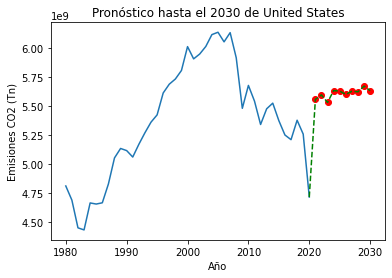


1/1 [==============================] - 0s 120ms/step - loss: 0.0312
-------- Resultados de China --------
Métricas:
 > mae = 0.03122914955019951 
 > mse = 0.0023666024208068848 
 > rmse = 0.04864773899316788 
 > mape = 4.600208759307861 
Pronóstico:
[1.0291881e+10 1.0362963e+10 9.8086226e+09 1.0550221e+10 1.0537140e+10
 1.0581041e+10 1.0342246e+10 1.0685617e+10 1.0636682e+10 1.0383613e+10]


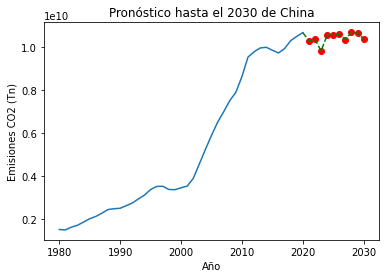


1/1 [==============================] - 0s 102ms/step - loss: 0.0062
-------- Resultados de Russia --------
Métricas:
 > mae = 0.006184726022183895 
 > mse = 5.295091978041455e-05 
 > rmse = 0.007276738062500954 
 > mape = 4.198248863220215 
Pronóstico:
[1.5776402e+09 1.4517997e+09 1.1130235e+09 1.3140205e+09 1.0921939e+09
 1.2594318e+09 1.3567683e+09 1.1344088e+09 1.3667747e+09 1.4724106e+09]


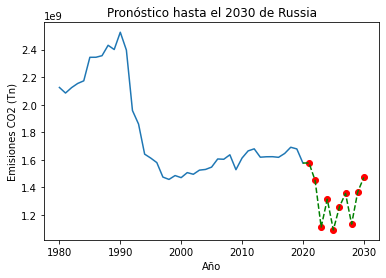


1/1 [==============================] - 0s 150ms/step - loss: 0.0062
-------- Resultados de India --------
Métricas:
 > mae = 0.006154167931526899 
 > mse = 4.674453884945251e-05 
 > rmse = 0.0068369978107512 
 > mape = 9.47724723815918 
Pronóstico:
[2.5453066e+09 2.6112141e+09 2.4126505e+09 2.4762030e+09 2.7087370e+09
 2.7323817e+09 2.7880243e+09 2.7740954e+09 2.7883459e+09 2.7989932e+09]


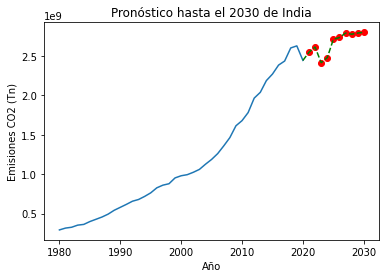


1/1 [==============================] - 0s 122ms/step - loss: 0.0057
-------- Resultados de Japan --------
Métricas:
 > mae = 0.005731303710490465 
 > mse = 7.52445193938911e-05 
 > rmse = 0.008674359880387783 
 > mape = 9.17069149017334 
Pronóstico:
[1.1921010e+09 1.2428134e+09 1.2333391e+09 1.2716545e+09 1.2663044e+09
 1.1605366e+09 1.1924721e+09 1.0628323e+09 1.2888701e+09 1.1393044e+09]


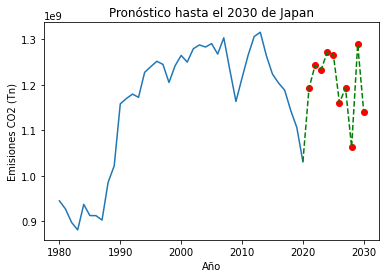


1/1 [==============================] - 0s 117ms/step - loss: 0.0044
-------- Resultados de Germany --------
Métricas:
 > mae = 0.004421795718371868 
 > mse = 3.773646676563658e-05 
 > rmse = 0.00614300137385726 
 > mape = 9.524012565612793 
Pronóstico:
[5.0827702e+08 4.0532480e+08 7.0977318e+08 8.2488480e+08 7.9278976e+08
 7.7148672e+08 7.9641062e+08 7.8492122e+08 8.2292102e+08 7.4112755e+08]


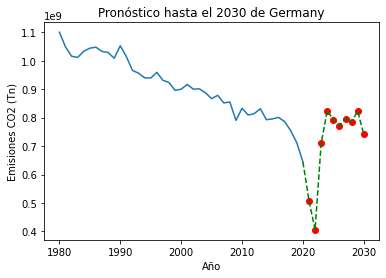

In [41]:
for pais in paises_g1:    
    norm = datos_norm_1[datos_norm_1['country'] == pais][cols]
    x = norm.loc[:,features]
    y = norm.iloc[:, -1]
    train_x, test_x, train_y, test_y = train_test_split(x , y, test_size = 0.15)
    model = model_MLANN(train_x, train_y, test_x, test_y, countr[countr['country'] == pais].iloc[0,1])
    model.evaluate(test_x, test_y)
    model_best = tf.keras.models.load_model(f"model_experiments/{countr[countr['country'] == pais].iloc[0,1]}")
    model_best.evaluate(test_x, test_y)
    model_pred = make_preds(model_best, test_x)
    model_results = evaluate_preds(y_true=tf.squeeze(test_y), 
                                 y_pred=model_pred)
    print(f'-------- Resultados de {pais} --------')
    print('Métricas:')
    print(f" > mae = {model_results['mae']} ")
    print(f" > mse = {model_results['mse']} ")
    print(f" > rmse = {model_results['rmse']} ")
    print(f" > mape = {model_results['mape']} ")
    print('Pronóstico:')
    future = parisTreaty[parisTreaty['country'] == pais]
    future = future[future['year'] <= mark][features]
    future_norm = scaler_inputs_1.transform(future)
    pred = make_preds(model_best, future_norm).numpy().reshape(-1,1)
    forecast = scaler_output_1.inverse_transform(pred)
    pais_plot = datos_country[datos_country['country'] == pais][cols]
    year_init = pais_plot.year.values.tolist()
    emission_init = pais_plot.co2emissions.values.tolist()
    print(forecast.flatten())
    plt.plot(year_init, emission_init)
    plt.plot(year_init[-1:] + year_future.flatten().tolist(), emission_init[-1:] + forecast.flatten().tolist(), c = 'g', linestyle = '--')
    plt.scatter(year_future.flatten().tolist(), forecast.flatten().tolist(), c = 'r')
    plt.xlabel("Año")
    plt.ylabel("Emisiones CO2 (Tn)")
    plt.title(f"Pronóstico hasta el 2030 de {pais}")
    plt.show();
    print()

#### United States (Prueba particular)

In [ ]:
usa_norm.evaluate(test_x, test_y)

1/1 [==============================] - 0s 40ms/step - loss: 0.0139


0.013942940160632133

In [ ]:
usa_best = tf.keras.models.load_model("model_experiments/USA")
usa_best.evaluate(test_x, test_y)

1/1 [==============================] - 0s 183ms/step - loss: 0.0098


0.009755290113389492

In [ ]:
usa_pred = make_preds(usa_best, test_x)

1/1 [==============================] - 0s 163ms/step


In [ ]:
usa_results = evaluate_preds(y_true=tf.squeeze(test_y), 
                                 y_pred=usa_pred)

In [ ]:
usa_results

{'mae': 0.00975529,
 'mse': 0.00015855924,
 'rmse': 0.012592031,
 'mape': 6.4827704,
 'mase': 0.64837563}

##### Pronóstico

In [ ]:
features

['co2PerCapita', 'gdp', 'population', 'energyConsumption']

In [ ]:
mark = 2030
year_future = np.arange(2021, mark + 1)

In [ ]:
future = parisTreaty[parisTreaty['country'] == 'United States']
future = future[future['year'] <= mark][features]
future

,co2PerCapita,gdp,population,energyConsumption
0,11.982846,6.847656e+12,130772680.0,11470.029
1,16.689499,1.913828e+13,353298780.0,30544.523
2,16.487717,1.892820e+13,339411070.0,28198.975
3,16.470270,1.701616e+13,339138700.0,27023.227
4,16.609556,1.812436e+13,342350600.0,29165.781
5,16.419992,1.974724e+13,355719400.0,29689.910
6,16.672802,2.006317e+13,366490240.0,29135.314
7,15.850641,1.923118e+13,362108220.0,28779.440
8,15.368574,2.055125e+13,366726530.0,29473.057
9,14.782460,1.986081e+13,368226300.0,28920.846


In [ ]:
future_norm = scaler_inputs.transform(future)
usa_pred = make_preds(usa_best, future_norm).numpy().reshape(-1,1)

1/1 [==============================] - 0s 77ms/step


In [ ]:
forecast = scaler_output.inverse_transform(usa_pred)

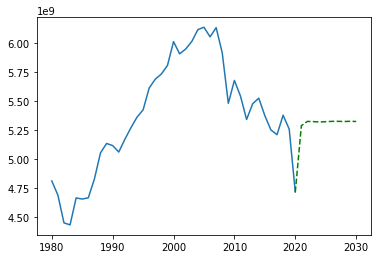

In [ ]:
usa = datos[datos['country'] == 'United States'][cols]
year_init = usa.year.values.tolist()
emission_init = usa.co2emissions.values.tolist()
plt.plot(year_init, emission_init)
plt.plot(year_init[-1:] + year_future.flatten().tolist(), emission_init[-1:] + forecast.flatten().tolist(), c = 'g', linestyle = '--')

In [ ]:
usa_norm = datos_norm[datos_norm['country'] == 'United States'][cols]

In [ ]:
x = usa_norm.loc[:,features]
y = usa_norm.iloc[:, -1]

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x , y, test_size = 0.2, random_state = 0)

In [ ]:
usa_norm = model_MLANN(train_x, train_y, test_x, test_y, 'USA')

INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets


In [ ]:
usa_norm.evaluate(test_x, test_y)

1/1 [==============================] - 0s 40ms/step - loss: 0.0139


0.013942940160632133

In [ ]:
usa_best = tf.keras.models.load_model("model_experiments/USA")
usa_best.evaluate(test_x, test_y)

1/1 [==============================] - 0s 183ms/step - loss: 0.0098


0.009755290113389492

In [ ]:
usa_pred = make_preds(usa_best, test_x)

1/1 [==============================] - 0s 163ms/step


In [ ]:
usa_results = evaluate_preds(y_true=tf.squeeze(test_y), 
                                 y_pred=usa_pred)

In [ ]:
usa_results

{'mae': 0.00975529,
 'mse': 0.00015855924,
 'rmse': 0.012592031,
 'mape': 6.4827704,
 'mase': 0.64837563}

##### Pronóstico

In [ ]:
features

['co2PerCapita', 'gdp', 'population', 'energyConsumption']

In [ ]:
mark = 2030
year_future = np.arange(2021, mark + 1)

In [ ]:
future = parisTreaty[parisTreaty['country'] == 'United States']
future = future[future['year'] <= mark][features]
future

,co2PerCapita,gdp,population,energyConsumption
0,11.982846,6.847656e+12,130772680.0,11470.029
1,16.689499,1.913828e+13,353298780.0,30544.523
2,16.487717,1.892820e+13,339411070.0,28198.975
3,16.470270,1.701616e+13,339138700.0,27023.227
4,16.609556,1.812436e+13,342350600.0,29165.781
5,16.419992,1.974724e+13,355719400.0,29689.910
6,16.672802,2.006317e+13,366490240.0,29135.314
7,15.850641,1.923118e+13,362108220.0,28779.440
8,15.368574,2.055125e+13,366726530.0,29473.057
9,14.782460,1.986081e+13,368226300.0,28920.846


In [ ]:
future_norm = scaler_inputs.transform(future)
usa_pred = make_preds(usa_best, future_norm).numpy().reshape(-1,1)

1/1 [==============================] - 0s 77ms/step


In [ ]:
forecast = scaler_output.inverse_transform(usa_pred)

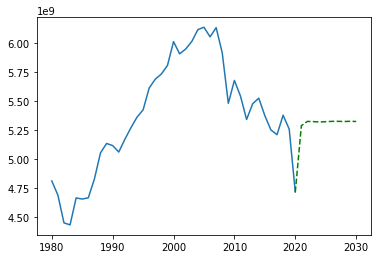

In [ ]:
usa = datos[datos['country'] == 'United States'][cols]
year_init = usa.year.values.tolist()
emission_init = usa.co2emissions.values.tolist()
plt.plot(year_init, emission_init)
plt.plot(year_init[-1:] + year_future.flatten().tolist(), emission_init[-1:] + forecast.flatten().tolist(), c = 'g', linestyle = '--')

In [ ]:
usa_norm = datos_norm[datos_norm['country'] == 'United States'][cols]

In [ ]:
x = usa_norm.loc[:,features]
y = usa_norm.iloc[:, -1]

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(x , y, test_size = 0.2, random_state = 0)

In [ ]:
usa_norm = model_MLANN(train_x, train_y, test_x, test_y, 'USA')

INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets
INFO:tensorflow:Assets written to: model_experiments\USA\assets


In [ ]:
usa_norm.evaluate(test_x, test_y)

1/1 [==============================] - 0s 40ms/step - loss: 0.0139


0.013942940160632133

In [ ]:
usa_best = tf.keras.models.load_model("model_experiments/USA")
usa_best.evaluate(test_x, test_y)

1/1 [==============================] - 0s 183ms/step - loss: 0.0098


0.009755290113389492

In [ ]:
usa_pred = make_preds(usa_best, test_x)

1/1 [==============================] - 0s 163ms/step


In [ ]:
usa_results = evaluate_preds(y_true=tf.squeeze(test_y), 
                                 y_pred=usa_pred)

In [ ]:
usa_results

{'mae': 0.00975529,
 'mse': 0.00015855924,
 'rmse': 0.012592031,
 'mape': 6.4827704,
 'mase': 0.64837563}

##### Pronóstico

In [ ]:
features

['co2PerCapita', 'gdp', 'population', 'energyConsumption']

In [ ]:
mark = 2030
year_future = np.arange(2021, mark + 1)

In [ ]:
future = parisTreaty[parisTreaty['country'] == 'United States']
future = future[future['year'] <= mark][features]
future

,co2PerCapita,gdp,population,energyConsumption
0,11.982846,6.847656e+12,130772680.0,11470.029
1,16.689499,1.913828e+13,353298780.0,30544.523
2,16.487717,1.892820e+13,339411070.0,28198.975
3,16.470270,1.701616e+13,339138700.0,27023.227
4,16.609556,1.812436e+13,342350600.0,29165.781
5,16.419992,1.974724e+13,355719400.0,29689.910
6,16.672802,2.006317e+13,366490240.0,29135.314
7,15.850641,1.923118e+13,362108220.0,28779.440
8,15.368574,2.055125e+13,366726530.0,29473.057
9,14.782460,1.986081e+13,368226300.0,28920.846


In [ ]:
future_norm = scaler_inputs.transform(future)
usa_pred = make_preds(usa_best, future_norm).numpy().reshape(-1,1)

1/1 [==============================] - 0s 77ms/step


In [ ]:
forecast = scaler_output.inverse_transform(usa_pred)

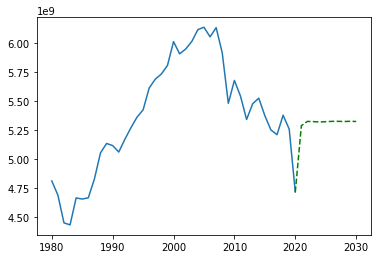

In [ ]:
usa = datos[datos['country'] == 'United States'][cols]
year_init = usa.year.values.tolist()
emission_init = usa.co2emissions.values.tolist()
plt.plot(year_init, emission_init)
plt.plot(year_init[-1:] + year_future.flatten().tolist(), emission_init[-1:] + forecast.flatten().tolist(), c = 'g', linestyle = '--')

### Grupo 2

In [42]:
emissions_percent_g2

,country,co2emissions
0,United Kingdom,1.94
1,Canada,1.90
2,Ukraine,1.57
3,South Korea,1.54
4,Italy,1.53
5,Mexico,1.44
6,France,1.43
7,Iran,1.43
8,South Africa,1.43
9,Poland,1.33


In [43]:
paises_g2 = emissions_percent_g2.country.unique()
paises_g2

array(['United Kingdom', 'Canada', 'Ukraine', 'South Korea', 'Italy',
       'Mexico', 'France', 'Iran', 'South Africa', 'Poland',
       'Saudi Arabia', 'Australia', 'Brazil', 'Indonesia'], dtype=object)

In [44]:
datos_norm_2 = datos_country[datos_country['country'].isin(paises_g2)].copy()
scaler_inputs_2 = MinMaxScaler()
scaler_output_2 = MinMaxScaler()
datos_norm_2.iloc[:,[3,4,5,6]] = scaler_inputs_2.fit_transform(datos_norm_2[cols].drop(['year','co2emissions'], axis=1))
datos_norm_2.iloc[:,1:2] = scaler_output_2.fit_transform(datos_norm_2[['co2emissions']])

In [45]:
datos_norm_2

,country,co2emissions,year,co2PerCapita,gdp,population,energyConsumption,energyProduction
205,Australia,0.193281,1980,0.701430,0.041890,0.018561,0.130494,1090.894
206,Australia,0.208051,1981,0.723576,0.045390,0.019277,0.135094,1213.920
207,Australia,0.213830,1982,0.725563,0.045276,0.020042,0.148059,1216.000
208,Australia,0.199826,1983,0.685777,0.045290,0.020859,0.139153,1331.907
209,Australia,0.217633,1984,0.711558,0.051774,0.021725,0.142197,1444.124
...,...,...,...,...,...,...,...,...
5325,United Kingdom,0.468289,2016,0.260722,0.615185,0.214555,0.509476,1529.866
5326,United Kingdom,0.450183,2017,0.250303,0.627746,0.216183,0.507846,1553.122
5327,United Kingdom,0.441455,2018,0.244488,0.636816,0.217753,0.507732,1605.775
5328,United Kingdom,0.421644,2019,0.233632,0.636816,0.219225,0.495220,1601.322


1/1 [==============================] - 0s 109ms/step - loss: 0.0236
-------- Resultados de United Kingdom --------
Métricas:
 > mae = 0.023640619590878487 
 > mse = 0.0009286331478506327 
 > rmse = 0.030473481863737106 
 > mape = 3.2909457683563232 
Pronóstico:


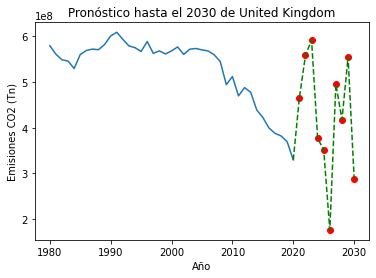


1/1 [==============================] - 0s 153ms/step - loss: 0.0200
-------- Resultados de Canada --------
Métricas:
 > mae = 0.019968565553426743 
 > mse = 0.0007952519226819277 
 > rmse = 0.028200211003422737 
 > mape = 2.91200590133667 
Pronóstico:


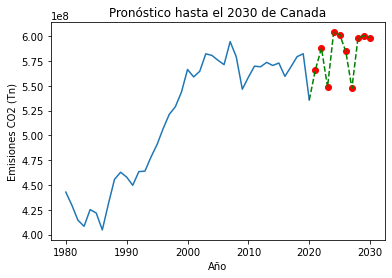


1/1 [==============================] - 0s 110ms/step - loss: 0.0078
-------- Resultados de Ukraine --------
Métricas:
 > mae = 0.007833866402506828 
 > mse = 9.705171396490186e-05 
 > rmse = 0.009851482696831226 
 > mape = 1.7897900342941284 
Pronóstico:


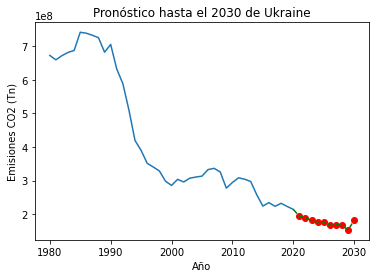


1/1 [==============================] - 0s 109ms/step - loss: 0.0164
-------- Resultados de South Korea --------
Métricas:
 > mae = 0.01641879603266716 
 > mse = 0.00039933156222105026 
 > rmse = 0.019983282312750816 
 > mape = 3.2935287952423096 
Pronóstico:


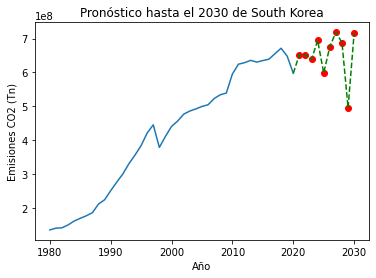


1/1 [==============================] - 0s 108ms/step - loss: 0.0207
-------- Resultados de Italy --------
Métricas:
 > mae = 0.02070225588977337 
 > mse = 0.0006290239398367703 
 > rmse = 0.025080349296331406 
 > mape = 3.977973699569702 
Pronóstico:


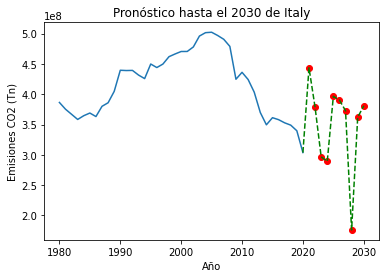


1/1 [==============================] - 0s 104ms/step - loss: 0.0163
-------- Resultados de Mexico --------
Métricas:
 > mae = 0.016321079805493355 
 > mse = 0.0003213310847058892 
 > rmse = 0.01792570948600769 
 > mape = 3.803698778152466 
Pronóstico:


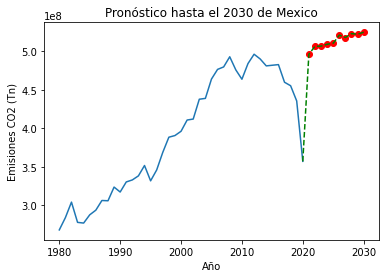


1/1 [==============================] - 0s 104ms/step - loss: 0.0158
-------- Resultados de France --------
Métricas:
 > mae = 0.015797384083271027 
 > mse = 0.0004925716202706099 
 > rmse = 0.02219395525753498 
 > mape = 3.4826531410217285 
Pronóstico:


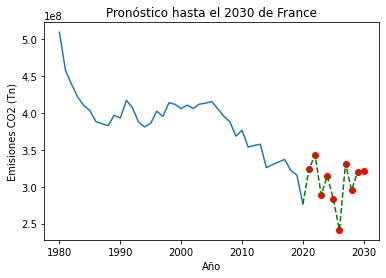


1/1 [==============================] - 0s 102ms/step - loss: 0.0134
-------- Resultados de Iran --------
Métricas:
 > mae = 0.013358885422348976 
 > mse = 0.00029181072022765875 
 > rmse = 0.017082467675209045 
 > mape = 4.796638011932373 
Pronóstico:


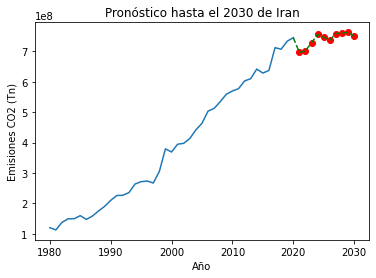


1/1 [==============================] - 0s 111ms/step - loss: 0.0198
-------- Resultados de South Africa --------
Métricas:
 > mae = 0.01982239820063114 
 > mse = 0.0006734892376698554 
 > rmse = 0.025951670482754707 
 > mape = 3.976489543914795 
Pronóstico:


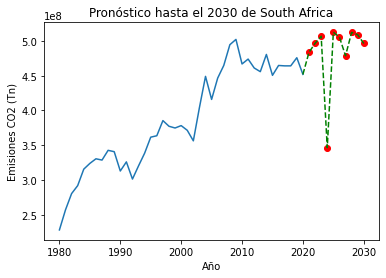


1/1 [==============================] - 0s 114ms/step - loss: 0.0067
-------- Resultados de Poland --------
Métricas:
 > mae = 0.006715727970004082 
 > mse = 5.802078885608353e-05 
 > rmse = 0.007617137860506773 
 > mape = 1.7199864387512207 
Pronóstico:


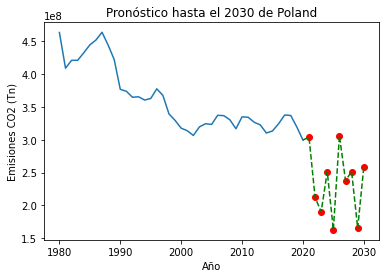


1/1 [==============================] - 0s 107ms/step - loss: 0.0381
-------- Resultados de Saudi Arabia --------
Métricas:
 > mae = 0.03813839703798294 
 > mse = 0.0021017303224653006 
 > rmse = 0.045844633132219315 
 > mape = 10.51757526397705 
Pronóstico:


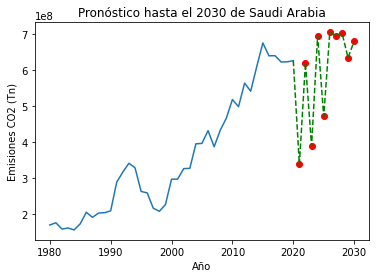


1/1 [==============================] - 0s 108ms/step - loss: 0.0074
-------- Resultados de Australia --------
Métricas:
 > mae = 0.007428288459777832 
 > mse = 6.788767495891079e-05 
 > rmse = 0.008239397779107094 
 > mape = 2.05755877494812 
Pronóstico:


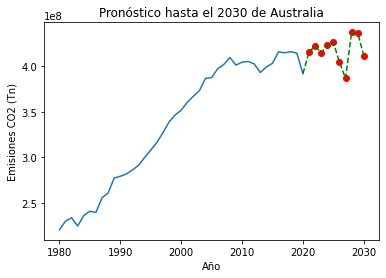


1/1 [==============================] - 0s 101ms/step - loss: 0.0206
-------- Resultados de Brazil --------
Métricas:
 > mae = 0.020551374182105064 
 > mse = 0.0007463890942744911 
 > rmse = 0.027320122346282005 
 > mape = 4.854563236236572 
Pronóstico:


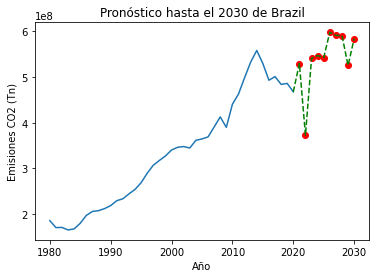


1/1 [==============================] - 0s 111ms/step - loss: 0.0175
-------- Resultados de Indonesia --------
Métricas:
 > mae = 0.017459997907280922 
 > mse = 0.0004803862830158323 
 > rmse = 0.021917715668678284 
 > mape = 8.844148635864258 
Pronóstico:


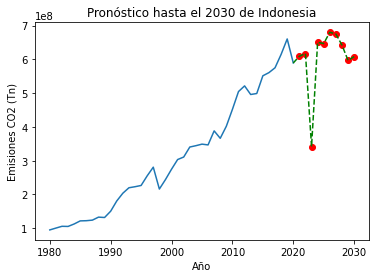

In [46]:
for pais in paises_g2:
    norm = datos_norm_2[datos_norm_2['country'] == pais][cols]
    x = norm.loc[:,features]
    y = norm.iloc[:, -1]
    train_x, test_x, train_y, test_y = train_test_split(x , y, test_size = 0.2, random_state = 0)
    model = model_MLANN(train_x, train_y, test_x, test_y, countr[countr['country'] == pais].iloc[0,1])
    model.evaluate(test_x, test_y)
    model_best = tf.keras.models.load_model(f"model_experiments/{countr[countr['country'] == pais].iloc[0,1]}")
    model_best.evaluate(test_x, test_y)
    model_pred = make_preds(model_best, test_x)
    model_results = evaluate_preds(y_true=tf.squeeze(test_y), 
                                 y_pred=model_pred)
    print(f'-------- Resultados de {pais} --------')
    print('Métricas:')
    print(f" > mae = {model_results['mae']} ")
    print(f" > mse = {model_results['mse']} ")
    print(f" > rmse = {model_results['rmse']} ")
    print(f" > mape = {model_results['mape']} ")
    print('Pronóstico:')
    future = parisTreaty[parisTreaty['country'] == pais]
    future = future[future['year'] <= mark][features]
    future_norm = scaler_inputs_2.transform(future)
    pred = make_preds(model_best, future_norm).numpy().reshape(-1,1)
    forecast = scaler_output_2.inverse_transform(pred)
    pais_plot = datos_country[datos_country['country'] == pais][cols]
    year_init = pais_plot.year.values.tolist()
    emission_init = pais_plot.co2emissions.values.tolist()
    plt.plot(year_init, emission_init)
    plt.plot(year_init[-1:] + year_future.flatten().tolist(), emission_init[-1:] + forecast.flatten().tolist(), c = 'g', linestyle = '--')
    plt.scatter(year_future.flatten().tolist(), forecast.flatten().tolist(), c = 'r')
    plt.xlabel("Año")
    plt.ylabel("Emisiones CO2 (Tn)")
    plt.title(f"Pronóstico hasta el 2030 de {pais}")
    plt.show();
    print()

#### Países restantes

In [47]:
pgroups = countr[['iso_code', 'country']][countr['country'].isin(paises)].reset_index(drop = True)
pgroups.to_csv('countries_dl.csv', header=True, index=False)

In [48]:
pgroups

,iso_code,country
0,AFG,Afghanistan
1,ALB,Albania
2,DZA,Algeria
3,AGO,Angola
4,ARG,Argentina
...,...,...
132,VEN,Venezuela
133,VNM,Vietnam
134,YEM,Yemen
135,ZMB,Zambia


In [49]:
ppaises = pgroups.country.values
ppaises

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belgium', 'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'Ecuador', 'Egypt', 'El Salvador', 'Eswatini', 'Ethiopia',
       'Finland', 'France', 'Gabon', 'Gambia', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq',
       'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan',
       'Kenya', 'Kuwait', 'Laos', 'Lebanon', 'Liberia', 'Libya',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta',
       'Mauritius', 'Mexico', 'Mo

In [50]:
paises_g3 = pgroups[~pgroups.country.isin(paises_g1.tolist() + paises_g2.tolist())].country.values
paises_g3

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Austria', 'Bahrain', 'Bangladesh', 'Barbados', 'Belgium', 'Benin',
       'Bolivia', 'Botswana', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Cape Verde', 'Chad', 'Chile', 'Colombia',
       'Comoros', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba',
       'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eswatini', 'Ethiopia', 'Finland', 'Gabon', 'Gambia', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hong Kong',
       'Hungary', 'Iceland', 'Iraq', 'Ireland', 'Israel', 'Jamaica',
       'Jordan', 'Kenya', 'Kuwait', 'Laos', 'Lebanon', 'Liberia', 'Libya',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Mali', 'Malta',
       'Mauritius', 'Mongolia', 'Morocco', 'Mozambique', 'Myanmar',
       'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger',
       'Nigeria', 'Nor

In [51]:
datos_norm_3 = datos_country[datos_country['country'].isin(paises_g3)].copy()
scaler_inputs_3 = MinMaxScaler()
scaler_output_3 = MinMaxScaler()
datos_norm_3.iloc[:,[3,4,5,6]] = scaler_inputs_3.fit_transform(datos_norm_3[cols].drop(['year','co2emissions'], axis=1))
datos_norm_3.iloc[:,1:2] = scaler_output_3.fit_transform(datos_norm_3[['co2emissions']])

In [52]:
datos_norm_3

,country,co2emissions,year,co2PerCapita,gdp,population,energyConsumption,energyProduction
0,Afghanistan,0.004051,1980,0.001746,0.009159,0.060184,0.003891,21.265
1,Afghanistan,0.004573,1981,0.002008,0.009350,0.059347,0.004390,27.175
2,Afghanistan,0.004848,1982,0.002198,0.009552,0.058038,0.004679,27.862
3,Afghanistan,0.005848,1983,0.002751,0.010020,0.056477,0.005736,29.223
4,Afghanistan,0.006558,1984,0.003187,0.010211,0.054967,0.005763,29.256
...,...,...,...,...,...,...,...,...
5612,Zimbabwe,0.025171,2016,0.010959,0.012560,0.063236,0.023574,35.024
5613,Zimbabwe,0.022453,2017,0.009620,0.013156,0.064170,0.023204,32.542
5614,Zimbabwe,0.027795,2018,0.011774,0.013619,0.065085,0.023997,38.408
5615,Zimbabwe,0.025667,2019,0.010711,0.011040,0.066021,0.024971,42.044


In [54]:
for pais in paises_g3:
    norm = datos_norm_3[datos_norm_3['country'] == pais][cols]
    x = norm.loc[:,features]
    y = norm.iloc[:, -1]
    train_x, test_x, train_y, test_y = train_test_split(x , y, test_size = 0.2, random_state = 0)
    model = model_MLANN(train_x, train_y, test_x, test_y, countr[countr['country'] == pais].iloc[0,1])
    model.evaluate(test_x, test_y)
    model_best = tf.keras.models.load_model(f"model_experiments/{countr[countr['country'] == pais].iloc[0,1]}")
    model_best.evaluate(test_x, test_y)
    model_pred = make_preds(model_best, test_x)
    model_results = evaluate_preds(y_true=tf.squeeze(test_y), 
                                 y_pred=model_pred)
    print(f'-------- Resultados de {pais} --------')
    print('Métricas:')
    print(f" > mae = {model_results['mae']} ")
    print(f" > mse = {model_results['mse']} ")
    print(f" > rmse = {model_results['rmse']} ")
    print(f" > mape = {model_results['mape']} ")
    print('Pronóstico:')
    future = parisTreaty[parisTreaty['country'] == pais]
    future = future[future['year'] <= mark][features]
    future_norm = scaler_inputs_3.transform(future)
    pred = make_preds(model_best, future_norm).numpy().reshape(-1,1)
    forecast = scaler_output_3.inverse_transform(pred)
    pais_plot = datos_country[datos_country['country'] == pais][cols]
    year_init = pais_plot.year.values.tolist()
    emission_init = pais_plot.co2emissions.values.tolist()
    plt.plot(year_init, emission_init)
    plt.plot(year_init[-1:] + year_future.flatten().tolist(), emission_init[-1:] + forecast.flatten().tolist(), c = 'g', linestyle = '--')
    plt.scatter(year_future.flatten().tolist(), forecast.flatten().tolist(), c = 'r')
    plt.xlabel("Año")
    plt.ylabel("Emisiones CO2 (Tn)")
    plt.title(f"Pronóstico hasta el 2030 de {pais}")
    plt.show();
    print()

Output hidden; open in https://colab.research.google.com to view.

### Proyecciones

In [55]:
forecast_emissions = pd.DataFrame(columns=['country','year','co2emissions'])
forecast_emissions

,country,year,co2emissions


##### Grupo *1*

In [56]:
yrs = np.arange(2021, mark + 1).reshape(-1,1)
for pais in paises_g1:
    ps = np.array([pais]*10).reshape(-1,1)
    block = np.concatenate((ps, yrs), axis = 1)
    model_best = tf.keras.models.load_model(f"model_experiments/{pgroups[pgroups['country'] == pais].iloc[0,0]}")
    future = parisTreaty[parisTreaty['country'] == pais]
    future = future[future['year'] <= mark][features]
    future_norm = scaler_inputs_1.transform(future)
    pred = make_preds(model_best, future_norm).numpy().reshape(-1,1)
    forecast = scaler_output_1.inverse_transform(pred)
    block_forecast = np.concatenate((block, forecast), axis = 1)
    forecast_emissions = forecast_emissions.append(pd.DataFrame(block_forecast, columns=['country','year','co2emissions']))

In [57]:
forecast_emissions

,country,year,co2emissions
0,United States,2021,5555095600.0
1,United States,2022,5594352600.0
2,United States,2023,5528461000.0
3,United States,2024,5631539000.0
4,United States,2025,5626453000.0
5,United States,2026,5597973500.0
6,United States,2027,5625463000.0
7,United States,2028,5620573700.0
8,United States,2029,5669677600.0
9,United States,2030,5629452000.0


##### Grupo *2*

In [58]:
yrs = np.arange(2021, mark + 1).reshape(-1,1)
for pais in paises_g2:
    ps = np.array([pais]*10).reshape(-1,1)
    block = np.concatenate((ps, yrs), axis = 1)
    model_best = tf.keras.models.load_model(f"model_experiments/{pgroups[pgroups['country'] == pais].iloc[0,0]}")
    future = parisTreaty[parisTreaty['country'] == pais]
    future = future[future['year'] <= mark][features]
    future_norm = scaler_inputs_2.transform(future)
    pred = make_preds(model_best, future_norm).numpy().reshape(-1,1)
    forecast = scaler_output_2.inverse_transform(pred)
    block_forecast = np.concatenate((block, forecast), axis = 1)
    forecast_emissions = forecast_emissions.append(pd.DataFrame(block_forecast, columns=['country','year','co2emissions']))

In [59]:
forecast_emissions

,country,year,co2emissions
0,United States,2021,5555095600.0
1,United States,2022,5594352600.0
2,United States,2023,5528461000.0
3,United States,2024,5631539000.0
4,United States,2025,5626453000.0
...,...,...,...
5,Indonesia,2026,680484800.0
6,Indonesia,2027,675309400.0
7,Indonesia,2028,642270000.0
8,Indonesia,2029,596852500.0


##### Grupo *3*

In [60]:
yrs = np.arange(2021, mark + 1).reshape(-1,1)
for pais in paises_g3:
    ps = np.array([pais]*10).reshape(-1,1)
    block = np.concatenate((ps, yrs), axis = 1)
    model_best = load_model(f"model_experiments/{pgroups[pgroups['country'] == pais].iloc[0,0]}")
    future = parisTreaty[parisTreaty['country'] == pais]
    future = future[future['year'] <= mark][features]
    future_norm = scaler_inputs_3.transform(future)
    pred = make_preds(model_best, future_norm).numpy().reshape(-1,1)
    forecast = scaler_output_3.inverse_transform(pred)
    block_forecast = np.concatenate((block, forecast), axis = 1)
    forecast_emissions = forecast_emissions.append(pd.DataFrame(block_forecast, columns=['country','year','co2emissions']))

In [61]:
forecast_emissions

,country,year,co2emissions
0,United States,2021,5555095600.0
1,United States,2022,5594352600.0
2,United States,2023,5528461000.0
3,United States,2024,5631539000.0
4,United States,2025,5626453000.0
...,...,...,...
5,Zimbabwe,2026,10742395.0
6,Zimbabwe,2027,10482346.0
7,Zimbabwe,2028,10392967.0
8,Zimbabwe,2029,10663305.0


In [62]:
forecast_emissions = forecast_emissions.astype({'country':'object', 'year':'int32', 'co2emissions':'float64'}).reset_index(drop=True)

In [63]:
forecast_emissions

,country,year,co2emissions
0,United States,2021,5.555096e+09
1,United States,2022,5.594353e+09
2,United States,2023,5.528461e+09
3,United States,2024,5.631539e+09
4,United States,2025,5.626453e+09
...,...,...,...
1365,Zimbabwe,2026,1.074240e+07
1366,Zimbabwe,2027,1.048235e+07
1367,Zimbabwe,2028,1.039297e+07
1368,Zimbabwe,2029,1.066330e+07


In [66]:
forecast_emissions.to_csv('forecast_emissions.csv', header=True, index=False)

### Zipeando el modelo

In [67]:
import shutil

archivo_zip = shutil.make_archive("models", "zip", base_dir = "/content/model_experiments")

In [68]:
print(archivo_zip)

models.zip


In [70]:
print()

In [71]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
